<a href="https://colab.research.google.com/github/SangBeom-Hahn/Kdata_Campus_Daily_Study/blob/master/%2B_%ED%94%BC%EB%B4%87_%ED%85%8C%EC%9D%B4%EB%B8%94_%EB%B3%80%EC%88%98_%EB%8D%94%EB%AF%B8%ED%99%94_%EA%B2%B0%EA%B3%BC_%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings, random
warnings.filterwarnings(action='ignore')

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from sklearn.cluster import KMeans


import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 계절별로 더미화

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/프로그래밍 언어 공부 자료/인공지능/2022 데청캠/강의 자료/6일차/2022 데이터 청년 캠퍼스 6일차 과제(신규식, 한상범)/456일차 PL/데이터/SolarPv(계절별) - 복사본.xlsx")

In [ ]:
df

,Date,Generatedpower,AveragePM10,Averagecloud,Hightemp,WeatherForecast,HumidityForecast,Rain,Sight,Sunlight
0,겨울,2230.406983,62.470588,0.000000,8.6,맑음,51.000000,0.0,10.357143,13.5526
1,겨울,2326.791016,44.529412,2.411765,8.1,맑음,44.571429,0.0,14.714286,13.1526
2,겨울,2477.729004,38.882353,0.352941,10.8,맑음,37.000000,0.0,10.671429,13.6300
3,겨울,241.446289,37.176471,7.352941,6.7,흐림,99.000000,4.0,9.385714,2.4199
4,겨울,2768.182617,35.823529,2.411765,3.5,맑음,54.571429,0.0,13.371429,12.2054
...,...,...,...,...,...,...,...,...,...,...
1350,가을,2878.000000,20.176471,1.588235,23.0,맑음,40.285714,0.0,13.285714,17.6437
1351,가을,2937.250000,24.000000,0.117647,22.3,맑음,41.571429,0.0,14.000000,20.1938
1352,가을,2693.000000,25.000000,3.058824,23.0,구름,41.000000,0.0,14.457143,19.6520
1353,가을,2639.250000,19.058824,2.176471,23.3,맑음,47.285714,0.0,14.142857,17.0335


In [ ]:
# 기본 전처리에 해당하는 전처리 1), 2)
df.at[df["Rain"] > 0, "Rain"] = 1
df.at[df["AveragePM10"] == -1, "AveragePM10"] = 0

In [ ]:
# 4)
df_Scaled = df.loc[:, ["AveragePM10", "Averagecloud", "Sight"]]
feature = ['AveragePM10', 'Averagecloud', 'Sight']

scaler = StandardScaler()
scaler.fit(df_Scaled)
df_Scaled_Result = scaler.transform(df_Scaled)
scaled_Result_Df = pd.DataFrame(df_Scaled_Result, columns = feature)
df_Main = df.drop(columns=['AveragePM10', 'Averagecloud', 'Sight'], axis = 1)
df_Total = pd.concat([df_Main, scaled_Result_Df], axis = 1)

In [ ]:
# + 날씨
df_Total = pd.get_dummies(df_Total, columns = ['WeatherForecast', "Date"])

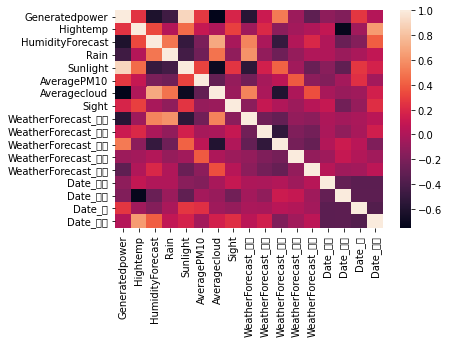

In [ ]:
# 운량이 다중공선성이 높음 -> 삭제
sns.heatmap(df_Total.corr())

In [ ]:
df_Total.drop("Averagecloud", axis = 1, inplace=True)

In [ ]:
X = df_Total.drop(["Generatedpower"], axis=1)
y = df_Total["Generatedpower"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 34)

In [ ]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train,verbose=True)

score = lgbm_model.score(X_valid, y_valid)
print(score)

0.8170099450678328


In [ ]:
# 점수가 떨어짐

# 구름 별로 더미화

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/프로그래밍 언어 공부 자료/인공지능/2022 데청캠/강의 자료/6일차/2022 데이터 청년 캠퍼스 6일차 과제(신규식, 한상범)/456일차 PL/데이터/SolarPv(구름) - 복사본.xlsx")

In [ ]:
df

,Date,Generatedpower,AveragePM10,Averagecloud,Hightemp,WeatherForecast,HumidityForecast,Rain,Sight,Sunlight
0,2017-01-26,2230.406983,62.470588,A,8.6,맑음,51.000000,0.0,10.357143,13.5526
1,2017-01-27,2326.791016,44.529412,B,8.1,맑음,44.571429,0.0,14.714286,13.1526
2,2017-01-28,2477.729004,38.882353,B,10.8,맑음,37.000000,0.0,10.671429,13.6300
3,2017-01-29,241.446289,37.176471,C,6.7,흐림,99.000000,4.0,9.385714,2.4199
4,2017-01-30,2768.182617,35.823529,B,3.5,맑음,54.571429,0.0,13.371429,12.2054
...,...,...,...,...,...,...,...,...,...,...
1350,2020-10-07,2878.000000,20.176471,B,23.0,맑음,40.285714,0.0,13.285714,17.6437
1351,2020-10-08,2937.250000,24.000000,B,22.3,맑음,41.571429,0.0,14.000000,20.1938
1352,2020-10-09,2693.000000,25.000000,B,23.0,구름,41.000000,0.0,14.457143,19.6520
1353,2020-10-10,2639.250000,19.058824,B,23.3,맑음,47.285714,0.0,14.142857,17.0335


In [ ]:
# 기본 전처리에 해당하는 전처리 1), 2)
df.at[df["Rain"] > 0, "Rain"] = 1
df.at[df["AveragePM10"] == -1, "AveragePM10"] = 0

In [ ]:
# 4)
df_Scaled = df.loc[:, ["AveragePM10", "Sight"]]
feature = ['AveragePM10', 'Sight']

scaler = StandardScaler()
scaler.fit(df_Scaled)
df_Scaled_Result = scaler.transform(df_Scaled)
scaled_Result_Df = pd.DataFrame(df_Scaled_Result, columns = feature)
df_Main = df.drop(columns=['AveragePM10', 'Sight'], axis = 1)
df_Total = pd.concat([df_Main, scaled_Result_Df], axis = 1)

In [ ]:
# + 날씨
df_Total = pd.get_dummies(df_Total, columns = ['WeatherForecast', "Averagecloud"])

In [ ]:
df_Total['Date'] = pd.to_datetime(df_Total['Date'])
df_Total['year'] = df_Total["Date"].dt.year
df_Total['month'] = df_Total["Date"].dt.month
df_Total['day'] = df_Total["Date"].dt.day
df_Total.drop(["Date"], axis = 1, inplace=True)

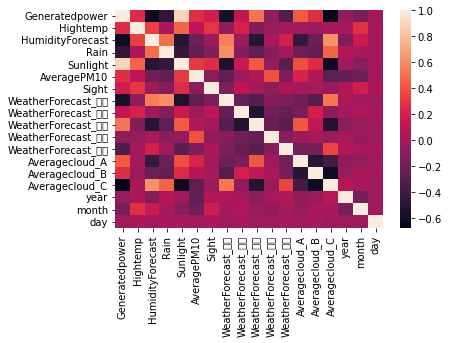

In [ ]:
# 운량이 다중공선성이 높음 -> 삭제 -> 더미화해서 삭제 안 함
sns.heatmap(df_Total.corr())

In [ ]:
X = df_Total.drop(["Generatedpower"], axis=1)
y = df_Total["Generatedpower"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 34)

In [ ]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train,verbose=True)

score = lgbm_model.score(X_valid, y_valid)
print(score)

0.8300603698925481


In [ ]:
# 83 돌파~~

# 습도별로 더미화

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/프로그래밍 언어 공부 자료/인공지능/2022 데청캠/강의 자료/6일차/2022 데이터 청년 캠퍼스 6일차 과제(신규식, 한상범)/456일차 PL/데이터/SolarPv(습도) - 복사본.xlsx")

In [ ]:
# 기본 전처리에 해당하는 전처리 1), 2)
df.at[df["Rain"] > 0, "Rain"] = 1
df.at[df["AveragePM10"] == -1, "AveragePM10"] = 0

In [ ]:
# 4)
df_Scaled = df.loc[:, ["AveragePM10", "Averagecloud", "Sight"]]
feature = ['AveragePM10', 'Averagecloud', 'Sight']

scaler = StandardScaler()
scaler.fit(df_Scaled)
df_Scaled_Result = scaler.transform(df_Scaled)
scaled_Result_Df = pd.DataFrame(df_Scaled_Result, columns = feature)
df_Main = df.drop(columns=['AveragePM10', 'Averagecloud', 'Sight'], axis = 1)
df_Total = pd.concat([df_Main, scaled_Result_Df], axis = 1)

In [ ]:
# + 날씨
df_Total = pd.get_dummies(df_Total, columns = ['WeatherForecast', "HumidityForecast"])

In [ ]:
df_Total['Date'] = pd.to_datetime(df_Total['Date'])
df_Total['year'] = df_Total["Date"].dt.year
df_Total['month'] = df_Total["Date"].dt.month
df_Total['day'] = df_Total["Date"].dt.day
df_Total.drop(["Date"], axis = 1, inplace=True)

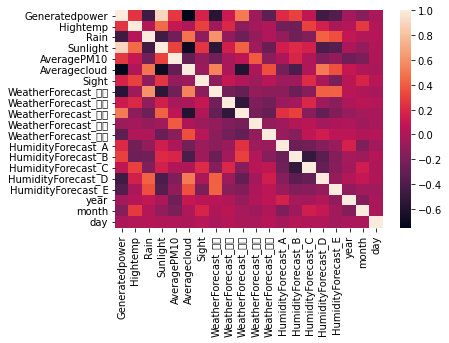

In [ ]:
# 운량이 다중공선성이 높음 -> 삭제 -> 더미화해서 삭제 안 함
sns.heatmap(df_Total.corr())

In [ ]:
df_Total.drop("Averagecloud", axis = 1, inplace=True)

In [ ]:
df_Total

,Generatedpower,Hightemp,Rain,Sunlight,AveragePM10,Sight,WeatherForecast_강수,WeatherForecast_구름,WeatherForecast_맑음,WeatherForecast_안개,WeatherForecast_흐림,HumidityForecast_A,HumidityForecast_B,HumidityForecast_C,HumidityForecast_D,HumidityForecast_E,year,month,day
0,2230.406983,8.6,0.0,13.5526,1.288648,-0.935683,0,0,1,0,0,1,0,0,0,0,2017,1,26
1,2326.791016,8.1,0.0,13.1526,0.408548,0.344995,0,0,1,0,0,0,1,0,0,0,2017,1,27
2,2477.729004,10.8,0.0,13.6300,0.131533,-0.843306,0,0,1,0,0,0,1,0,0,0,2017,1,28
3,241.446289,6.7,1.0,2.4199,0.047852,-1.221211,0,0,0,0,1,0,0,0,0,1,2017,1,29
4,2768.182617,3.5,0.0,12.2054,-0.018517,-0.049706,0,0,1,0,0,0,0,1,0,0,2017,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,2878.000000,23.0,0.0,17.6437,-0.786079,-0.074899,0,0,1,0,0,0,1,0,0,0,2020,10,7
1351,2937.250000,22.3,0.0,20.1938,-0.598517,0.135048,0,0,1,0,0,0,1,0,0,0,2020,10,8
1352,2693.000000,23.0,0.0,19.6520,-0.549462,0.269414,0,1,0,0,0,0,1,0,0,0,2020,10,9
1353,2639.250000,23.3,0.0,17.0335,-0.840905,0.177037,0,0,1,0,0,0,1,0,0,0,2020,10,10


In [ ]:
X = df_Total.drop(["Generatedpower"], axis=1)
y = df_Total["Generatedpower"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 34)

In [ ]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train,verbose=True)

score = lgbm_model.score(X_valid, y_valid)
print(score)

0.8162296748941273


# 결론
1. 아무런 전처리하지 않았을 때보다 잘 나온다!!! 확인
2. 하지만 다중 공선성을 만족시키기 위해 컬럼을 삭제했을 때보다 삭제하지 않고 전부 포함했을 때가 더 정확도가 높다..
3. 이런 전처리 평가 전처리 평가를 하면서 정확도를 높이는 거다~~(+ 교차검증으로 하퍼 조정까지하면 최고)

# 종속변수 더미화하고 결과 비교
0731에 판다스 강화 공부하고 난 나에게 이정도는 식은죽 먹기!!




## 종속변수 + 계절로 더미화

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/프로그래밍 언어 공부 자료/인공지능/2022 데청캠/강의 자료/6일차/2022 데이터 청년 캠퍼스 6일차 과제(신규식, 한상범)/456일차 PL/데이터/SolarPv(계절별) - 복사본.xlsx")

In [ ]:
df

,Date,Generatedpower,AveragePM10,Averagecloud,Hightemp,WeatherForecast,HumidityForecast,Rain,Sight,Sunlight
0,겨울,2230.406983,62.470588,0.000000,8.6,맑음,51.000000,0.0,10.357143,13.5526
1,겨울,2326.791016,44.529412,2.411765,8.1,맑음,44.571429,0.0,14.714286,13.1526
2,겨울,2477.729004,38.882353,0.352941,10.8,맑음,37.000000,0.0,10.671429,13.6300
3,겨울,241.446289,37.176471,7.352941,6.7,흐림,99.000000,4.0,9.385714,2.4199
4,겨울,2768.182617,35.823529,2.411765,3.5,맑음,54.571429,0.0,13.371429,12.2054
...,...,...,...,...,...,...,...,...,...,...
1350,가을,2878.000000,20.176471,1.588235,23.0,맑음,40.285714,0.0,13.285714,17.6437
1351,가을,2937.250000,24.000000,0.117647,22.3,맑음,41.571429,0.0,14.000000,20.1938
1352,가을,2693.000000,25.000000,3.058824,23.0,구름,41.000000,0.0,14.457143,19.6520
1353,가을,2639.250000,19.058824,2.176471,23.3,맑음,47.285714,0.0,14.142857,17.0335


In [ ]:
# 종속변수 더미화
df.loc[ df["Generatedpower"] < 1085 , "Generatedpower"] = 100

In [ ]:
df["Generatedpower"].value_counts()

100.0000     223
2137.6800     14
2013.5000      2
2015.2500      2
2601.0000      2
            ... 
2291.7500      1
2581.1250      1
2799.3125      1
2839.6250      1
2639.2500      1
Name: Generatedpower, Length: 1104, dtype: int64

In [ ]:
df.loc[ (df["Generatedpower"] >= 1085) & (df["Generatedpower"] < 2085), "Generatedpower"] = 1100

In [ ]:
df.loc[ (df["Generatedpower"] >= 2085) & (df["Generatedpower"] < 3085), "Generatedpower"] = 2100

In [ ]:
df.loc[ (df["Generatedpower"] >= 3085) & (df["Generatedpower"] < 4085), "Generatedpower"] = 3100

In [ ]:
df["Generatedpower"].value_counts()

2100.0    523
1100.0    367
3100.0    242
100.0     223
Name: Generatedpower, dtype: int64

#  와,,, 이래서 프로젝트 하라는 말이구나
### 사용자 지정함수 + apply 완벽 적용

In [ ]:
def filtering(x):
  if(x < 1085):
    return 'A'
  elif(1085 <= x < 2085):
    return 'B'
  elif(2085 <= x < 3085):
    return 'C'
  else:
    return 'D'

In [ ]:
df["Generatedpower"] = df["Generatedpower"].apply(filtering)

In [ ]:
df["Generatedpower"].value_counts()

C    523
B    367
D    242
A    223
Name: Generatedpower, dtype: int64

In [ ]:
df

,Date,Generatedpower,AveragePM10,Averagecloud,Hightemp,WeatherForecast,HumidityForecast,Rain,Sight,Sunlight
0,겨울,C,62.470588,0.000000,8.6,맑음,51.000000,0.0,10.357143,13.5526
1,겨울,C,44.529412,2.411765,8.1,맑음,44.571429,0.0,14.714286,13.1526
2,겨울,C,38.882353,0.352941,10.8,맑음,37.000000,0.0,10.671429,13.6300
3,겨울,A,37.176471,7.352941,6.7,흐림,99.000000,4.0,9.385714,2.4199
4,겨울,C,35.823529,2.411765,3.5,맑음,54.571429,0.0,13.371429,12.2054
...,...,...,...,...,...,...,...,...,...,...
1350,가을,C,20.176471,1.588235,23.0,맑음,40.285714,0.0,13.285714,17.6437
1351,가을,C,24.000000,0.117647,22.3,맑음,41.571429,0.0,14.000000,20.1938
1352,가을,C,25.000000,3.058824,23.0,구름,41.000000,0.0,14.457143,19.6520
1353,가을,C,19.058824,2.176471,23.3,맑음,47.285714,0.0,14.142857,17.0335


In [ ]:
# 기본 전처리에 해당하는 전처리 1), 2)
df.at[df["Rain"] > 0, "Rain"] = 1
df.at[df["AveragePM10"] == -1, "AveragePM10"] = 0

In [ ]:
# 4)
df_Scaled = df.loc[:, ["AveragePM10", "Averagecloud", "Sight"]]
feature = ['AveragePM10', 'Averagecloud', 'Sight']

scaler = StandardScaler()
scaler.fit(df_Scaled)
df_Scaled_Result = scaler.transform(df_Scaled)
scaled_Result_Df = pd.DataFrame(df_Scaled_Result, columns = feature)
df_Main = df.drop(columns=['AveragePM10', 'Averagecloud', 'Sight'], axis = 1)
df_Total = pd.concat([df_Main, scaled_Result_Df], axis = 1)

In [ ]:
# + 날씨
df_Total = pd.get_dummies(df_Total, columns = ['WeatherForecast', "Date"])

In [ ]:
# 다중공선성은 하지 말자
#df_Total.drop("Averagecloud", axis = 1, inplace=True)

In [ ]:
X = df_Total.drop(["Generatedpower"], axis=1)
y = df_Total["Generatedpower"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 34)

In [ ]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train,verbose=True)

score = lgbm_model.score(X_valid, y_valid)
print(score)

0.7343173431734318


# 종속변수 + 구름으로 더미화

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/프로그래밍 언어 공부 자료/인공지능/2022 데청캠/강의 자료/6일차/2022 데이터 청년 캠퍼스 6일차 과제(신규식, 한상범)/456일차 PL/데이터/SolarPv(구름) - 복사본.xlsx")

In [ ]:
df["Generatedpower"] = df["Generatedpower"].apply(filtering)

In [ ]:
# 기본 전처리에 해당하는 전처리 1), 2)
df.at[df["Rain"] > 0, "Rain"] = 1
df.at[df["AveragePM10"] == -1, "AveragePM10"] = 0

In [ ]:
# 4)
df_Scaled = df.loc[:, ["AveragePM10", "Sight"]]
feature = ['AveragePM10', 'Sight']

scaler = StandardScaler()
scaler.fit(df_Scaled)
df_Scaled_Result = scaler.transform(df_Scaled)
scaled_Result_Df = pd.DataFrame(df_Scaled_Result, columns = feature)
df_Main = df.drop(columns=['AveragePM10', 'Sight'], axis = 1)
df_Total = pd.concat([df_Main, scaled_Result_Df], axis = 1)

In [ ]:
# + 날씨
df_Total = pd.get_dummies(df_Total, columns = ['WeatherForecast', "Averagecloud"])

In [ ]:
df_Total['Date'] = pd.to_datetime(df_Total['Date'])
df_Total['year'] = df_Total["Date"].dt.year
df_Total['month'] = df_Total["Date"].dt.month
df_Total['day'] = df_Total["Date"].dt.day
df_Total.drop(["Date"], axis = 1, inplace=True)

In [ ]:
X = df_Total.drop(["Generatedpower"], axis=1)
y = df_Total["Generatedpower"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 34)

In [ ]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train,verbose=True)

score = lgbm_model.score(X_valid, y_valid)
print(score)

0.7638376383763837


In [ ]:
# wow 3퍼나 오름

# 종속 + 습도별 더미화

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/프로그래밍 언어 공부 자료/인공지능/2022 데청캠/강의 자료/6일차/2022 데이터 청년 캠퍼스 6일차 과제(신규식, 한상범)/456일차 PL/데이터/SolarPv(습도) - 복사본.xlsx")

In [ ]:
df["Generatedpower"] = df["Generatedpower"].apply(filtering)

In [ ]:
# 기본 전처리에 해당하는 전처리 1), 2)
df.at[df["Rain"] > 0, "Rain"] = 1
df.at[df["AveragePM10"] == -1, "AveragePM10"] = 0

In [ ]:
# 4)
df_Scaled = df.loc[:, ["AveragePM10", "Averagecloud", "Sight"]]
feature = ['AveragePM10', 'Averagecloud', 'Sight']

scaler = StandardScaler()
scaler.fit(df_Scaled)
df_Scaled_Result = scaler.transform(df_Scaled)
scaled_Result_Df = pd.DataFrame(df_Scaled_Result, columns = feature)
df_Main = df.drop(columns=['AveragePM10', 'Averagecloud', 'Sight'], axis = 1)
df_Total = pd.concat([df_Main, scaled_Result_Df], axis = 1)

In [ ]:
# + 날씨
df_Total = pd.get_dummies(df_Total, columns = ['WeatherForecast', "HumidityForecast"])

In [ ]:
df_Total['Date'] = pd.to_datetime(df_Total['Date'])
df_Total['year'] = df_Total["Date"].dt.year
df_Total['month'] = df_Total["Date"].dt.month
df_Total['day'] = df_Total["Date"].dt.day
df_Total.drop(["Date"], axis = 1, inplace=True)

In [ ]:
X = df_Total.drop(["Generatedpower"], axis=1)
y = df_Total["Generatedpower"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 34)

In [ ]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train,verbose=True)

score = lgbm_model.score(X_valid, y_valid)
print(score)

0.7712177121771218


In [ ]:
# 77~~~~~ 4퍼나 오름